In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator  import make_blobs
#import all the libraries 

In [2]:
n_samples = 50           #number of points 
n_features=2             #characteristics

x_data, y_data = make_blobs(n_samples=n_samples, n_features=n_features, centers=2 , cluster_std=1.05,
                           random_state=42) #divide the data in two cente r

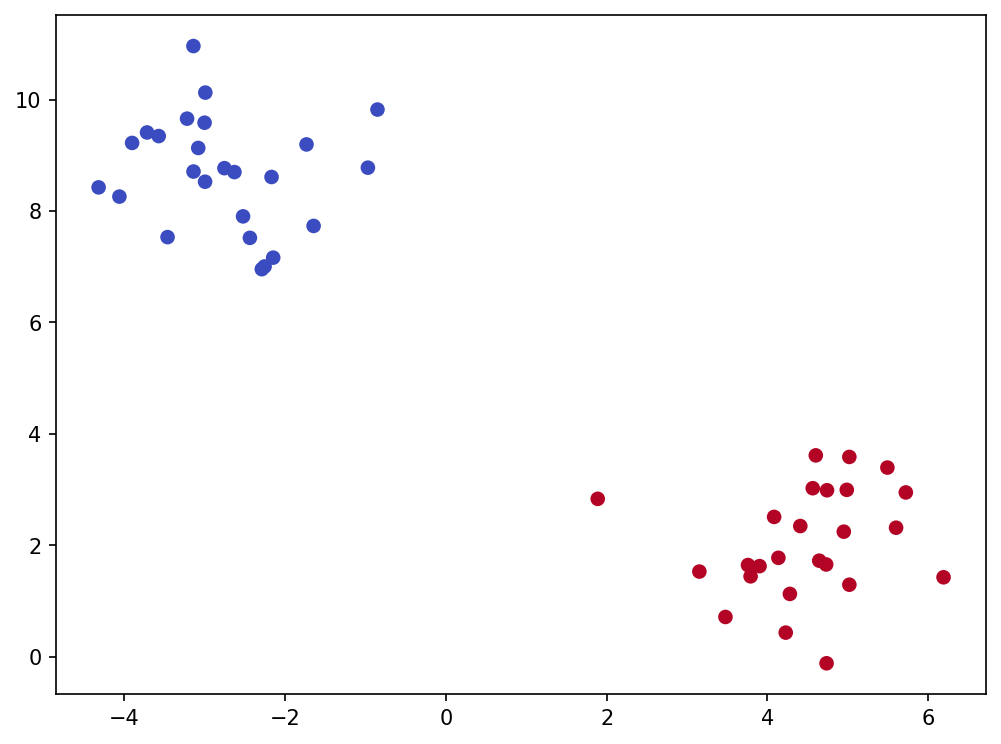

In [3]:
plt.figure(figsize=[8, 6], dpi=150) #aplicate de size of sixes 

plt.scatter(x_data[:,0], x_data[:,1] , c=y_data , cmap=plt.cm.coolwarm) #predict  
plt.show()

In [4]:
class_0 = []   #num of clases in x
class_1= []

for idx, y_value in enumerate (y_data):
    if y_value == 0:
        class_0.append(x_data[idx])
    else:
        class_1.append(x_data[idx])
        
data_dict ={
    -1:np.array(class_0),
    1:np.array(class_1)
}


In [5]:
#test values

w=[1]*n_features #define the w

w= np.array(w) 
b=0

In [6]:
def prediction(x_vals):   #functions of perdictions 
    return np.sign(np.dot(x_vals, w)+b)

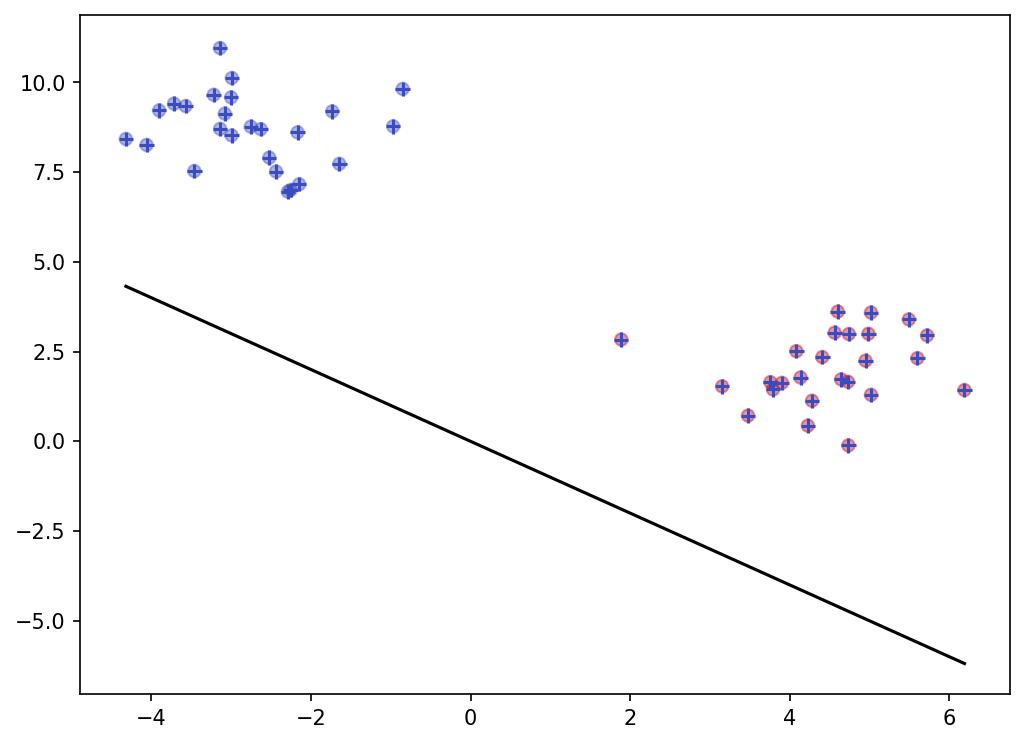

In [7]:
plt.figure(figsize=[8,6], dpi=150)

x_line =np.linspace(x_data[:,0].min(), x_data[:,0].max(),1000) #the minimum and the mas of the line 
plt.scatter(x_data[:,0], x_data[:,1] , c=y_data, cmap=plt.cm.coolwarm, alpha=0.4) 
plt.scatter(x_data[:,0], x_data[:,1], c=prediction(x_data), cmap=plt.cm.coolwarm, marker='+', s=48)
plt.plot(x_line, -(w[0]*x_line+b)/w[1],color='black') #make aline in clor black that will be put by the function 
plt.show()

In [8]:
optimization_dict={}

transformations = [
    [1, 1],
    [1, -1],
    [-1,-1],
    [-1, 1],
]

max_feature_value = x_data.max()
min_feature_value = x_data.min()

step_sizes = [max_feature_value * 0.1, max_feature_value* 0.01, max_feature_value*0.001]

b_range= 5
b_multiple= 5
latest_optimum = max_feature_value * 10

In [9]:
for step in step_sizes:
    w= np.array([latest_optimum]*n_features)
    optimized =False
    while not optimized:
        for b in np.arange(-1*max_feature_value*b_multiple, max_feature_value*b_multiple,step*b_multiple):
            for transformation in transformations:
                w_test=w*transformation
                option_viable=True
                for y_value in data_dict:
                    if option_viable:
                        for x_value in data_dict[y_value]:
                            if not y_value*(np.dot(x_value, w_test) + b) >= 1:
                                option_viable =False
                                break
                if option_viable:
                    optimization_dict[np.linalg.norm(w_test)] =[w_test, b]
        if w[0] < 0:
            optimized = True
            print('Step optimzed')
        else:
            w -= step
    norms= sorted([n for n in optimization_dict])
    optimized_choise = optimization_dict[norms[0]]
    w=optimized_choise[0]
    b=optimized_choise[1]
    print(w,b)
    latest_optimum = w[0]+step*2
    
    

Step optimzed
[ 1.09591782 -1.09591782] 5.479589110966337
Step optimzed
[ 0.32877535 -0.32877535] 1.6438767332899644
Step optimzed
[ 0.2520611 -0.2520611] 1.3151013866312553


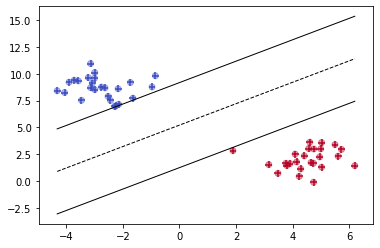

In [12]:
x_line = np.linspace(x_data[:,0].min(), x_data[:,0].max(), 1000)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap=plt.cm.coolwarm, alpha= 0.4)
plt.scatter(x_data[:,0], x_data[:,1], c=prediction(x_data), cmap=plt.cm.coolwarm, marker='+', s=48)
plt.plot(x_line, -(w[0]*x_line+b)/w[1],color='black',linestyle='dashed',linewidth=1)
plt.plot(x_line, -(w[0]*x_line+b+1)/w[1],color='black',linewidth=1)
plt.plot(x_line, -(w[0]*x_line+b-1)/w[1],color='black',linewidth=1)
         